In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt

In [10]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten,LSTM,ConvLSTM2D,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [3]:
from dataset import myData

原数据集训练样本数：19634，去除空值后样本数：10452
原数据集测试样本数：2203，去除空值后样本数：1169


In [4]:
data=myData()

In [5]:
X_train,y_train,X_test,y_test=data.dataset01()

X_train'shape:(10452, 1000, 12)  y_train'shape:(10452, 2)  X_test'shape:(1169, 1000, 12)  y_test'shape:(1169, 2)


In [6]:
verbose, epochs, batch_size = 1, 15, 64
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [7]:
n_timesteps, n_features, n_outputs

(1000, 12, 2)

In [8]:
#define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))


model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 64)           2368      
                                                                 
 conv1d_1 (Conv1D)           (None, 996, 128)          24704     
                                                                 
 conv1d_2 (Conv1D)           (None, 994, 256)          98560     
                                                                 
 dropout (Dropout)           (None, 994, 256)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 497, 256)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               142800    
                                                        

In [14]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data=(X_test, y_test), validation_freq=1,callbacks=callbacks)


Epoch 1/15
82/82 [==============================] - 242s 3s/step - loss: 0.5144 - accuracy: 0.7821 - val_loss: 0.5003 - val_accuracy: 0.7836
Epoch 2/15
82/82 [==============================] - 314s 4s/step - loss: 0.4679 - accuracy: 0.8009 - val_loss: 0.4389 - val_accuracy: 0.8169
Epoch 3/15
82/82 [==============================] - 273s 3s/step - loss: 0.4812 - accuracy: 0.8021 - val_loss: 0.4643 - val_accuracy: 0.8050
Epoch 4/15
82/82 [==============================] - 222s 3s/step - loss: 0.4503 - accuracy: 0.8102 - val_loss: 0.4879 - val_accuracy: 0.7553
Epoch 5/15
82/82 [==============================] - 220s 3s/step - loss: 0.4132 - accuracy: 0.8263 - val_loss: 0.3928 - val_accuracy: 0.8281
Epoch 6/15
82/82 [==============================] - 220s 3s/step - loss: 0.5391 - accuracy: 0.7588 - val_loss: 0.5253 - val_accuracy: 0.7810
Epoch 7/15
82/82 [==============================] - 218s 3s/step - loss: 0.4882 - accuracy: 0.7808 - val_loss: 0.4580 - val_accuracy: 0.7819
Epoch 8/15
82

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
 

In [16]:
actual = y_test.argmax(axis=1)     #真实的类别标签（将one-hot)标签逆向
predict_x=model.predict(X_test) #预测标签
predicted=np.argmax(predict_x,axis=1)#one-hot编码逆向

# 计算总的精度
acc = accuracy_score(actual, predicted)
print("准确率： ",acc)
# 计算混淆矩阵
print("混淆矩阵：")
print(confusion_matrix(actual, predicted))
#计算 precision_score
print("precision_score:",end="  ")
print(precision_score(actual, predicted, average="binary", pos_label=1)) # pos_label设置为1，代表标签为1的样本是正例，标签为2的样本是负例。
#	recall
print("recall: ",end=" ")
print(recall_score(actual, predicted, average="binary", pos_label=1))
#	F1
print("f1 score: ",end=" ")
print(f1_score(actual, predicted, average="binary", pos_label=1))

准确率：  0.8793840889649273
混淆矩阵：
[[160  96]
 [ 45 868]]
precision_score:  0.9004149377593361
recall:  0.9507119386637459
f1 score:  0.9248801278636123


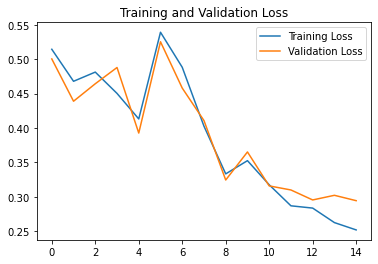

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()